# Chart Library Notebook

This notebook will begin the basis for production level chart library using the agmktdb.

In [1]:
import os

# Data science
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine
import psycopg2
import agmkt_pkg.nass as nass
import agmkt_pkg.env_vars as env_vars
import agmkt_pkg.utils as utils


print('Libraries imported!!')

Libraries imported!!


# Create SELECT statement to pull raw data

In [2]:
# create sql connection
user = env_vars.mktdb_user()
password = env_vars.mktdb_passwd()
server = env_vars.mktdb_server()


connection_string = f'postgresql://{user}:{password}@{server}/mktdb'
eng = create_engine(connection_string)
conn = eng.connect()

In [ ]:
stmt_dict = {'COMMODITY_DESC': 'CORN', 'PRODN_PRACTICE_DESC':'ALL PRODUCTION PRACTICES', 
             'UTIL_PRACTICE_DESC':'GRAIN', 
             'STATISTICCAT_DESC':'PRODUCTION', 'UNIT_DESC':'$', 'AGG_LEVEL_DESC':'NATIONAL', 'REFERENCE_PERIOD_DESC':'YEAR'}

df = nass.df_time_series_chart(stmt_dict=stmt_dict, db_connect=conn)


# Manipulate data for data visualization

In [4]:
print(df.info())

df_trim = utils.keep_cols(df, default_cols=['SHORT_DESC'])

print(df_trim.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SOURCE_DESC            76 non-null     object        
 1   SECTOR_DESC            76 non-null     object        
 2   GROUP_DESC             76 non-null     object        
 3   COMMODITY_DESC         76 non-null     object        
 4   CLASS_DESC             76 non-null     object        
 5   PRODN_PRACTICE_DESC    76 non-null     object        
 6   UTIL_PRACTICE_DESC     76 non-null     object        
 7   STATISTICCAT_DESC      76 non-null     object        
 8   UNIT_DESC              76 non-null     object        
 9   SHORT_DESC             76 non-null     object        
 10  DOMAIN_DESC            76 non-null     object        
 11  DOMAINCAT_DESC         76 non-null     object        
 12  AGG_LEVEL_DESC         76 non-null     object        
 13  STATE_A

# Create Visualziation and save image to folder

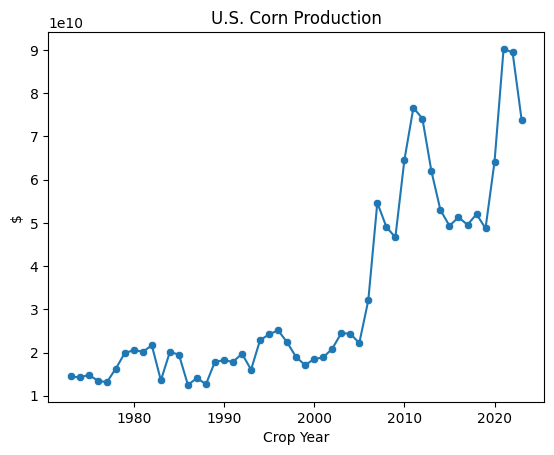

In [5]:
df_viz = df[df['date'].dt.year >= df['date'].dt.year.max() - 50]

str_commodity = stmt_dict['COMMODITY_DESC'].title()
str_statistic = stmt_dict['STATISTICCAT_DESC'].title()
str_unit = stmt_dict['UNIT_DESC'].title()

plt.subplot()
sns.lineplot(data=df_viz, x='date', y='VALUE')
sns.scatterplot(data=df_viz, x='date', y='VALUE')
plt.title(f'U.S. {str_commodity} {str_statistic}')
plt.ylabel(f'{str_unit}')
plt.xlabel('Crop Year')
plt.show()

In [6]:
df.BEGIN_CODE.unique()[0].dtype

dtype('int64')

In [7]:
df[df['BEGIN_CODE']<1].tail()

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,...,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%,date
71,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,$,"CORN, GRAIN - PRODUCTION, MEASURED IN $",...,1993,ANNUAL,0,0,YEAR,None,2012-01-01,1.603552e+10,None,1993-01-01
72,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,$,"CORN, GRAIN - PRODUCTION, MEASURED IN $",...,1998,ANNUAL,0,0,YEAR,None,2012-01-01,1.892208e+10,None,1998-01-01
73,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,$,"CORN, GRAIN - PRODUCTION, MEASURED IN $",...,2000,ANNUAL,0,0,YEAR,None,2012-01-01,1.849900e+10,None,2000-01-01
74,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,$,"CORN, GRAIN - PRODUCTION, MEASURED IN $",...,1970,ANNUAL,0,0,YEAR,None,2012-01-01,5.514702e+09,None,1970-01-01
75,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,$,"CORN, GRAIN - PRODUCTION, MEASURED IN $",...,1984,ANNUAL,0,0,YEAR,None,2012-01-01,2.014388e+10,None,1984-01-01
